In [1]:
# Make sure you have added the dev version of SSM julia to the local project env using "dev /path/to/ssm_julia" in the package manager REPL

using Pkg
Pkg.activate("..")
Pkg.instantiate()

using Random
using Distributions

using Revise
using SSM

  Activating project at `c:\Users\carso\OneDrive\Desktop\DePasquale\Ryan\ssm_julia\notebooks\interactive_tests`


## 1D features, 1D targets 

### generate data

In [2]:
model = SwitchingGaussianRegression(num_features=1, num_targets=1, K=2)

model.A = [0.9 0.1;
        0.1 0.9]

model.πₖ = [1, 0]


covariance = reshape([0.2], 1, 1)
coefficients = reshape([3 0.5], 2, 1)

emission_1 = RegressionEmissions(GaussianRegression(coefficients, covariance, num_features=1, num_targets=1))


covariance = reshape([.1], 1, 1)
coefficients = reshape([-1.0 2], 2, 1)

emission_2 = RegressionEmissions(GaussianRegression(coefficients, covariance, num_features=1, num_targets=1))

model.B[1] = emission_1
model.B[2] = emission_2

RegressionEmissions(GaussianRegression(1, 1, [-1.0; 2.0;;], [0.1;;], true, 0.0))

In [3]:
n = 1000
X = randn(n, 1)


y, z = SSM.sample(model, X)

([3.1888106908994374; 3.709999963582835; … ; 2.011620253240007; 4.144571821045349;;], [1.0 0.0; 1.0 0.0; … ; 1.0 0.0; 1.0 0.0])

### plot data

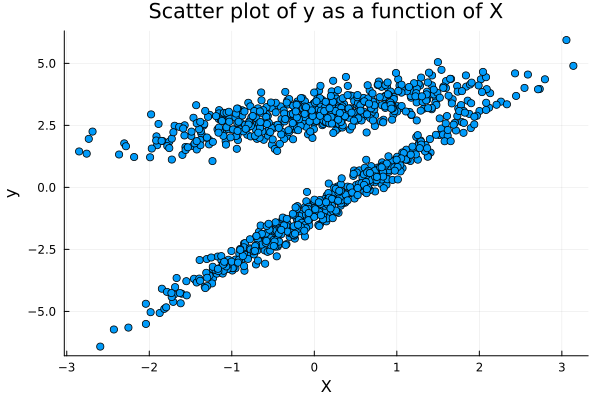

In [4]:
# plot a scatter of y as a function of X, and color the data points according to the state sequence z
using Plots

scatter(X, y, legend=false)
xlabel!("X")
ylabel!("y")
title!("Scatter plot of y as a function of X")



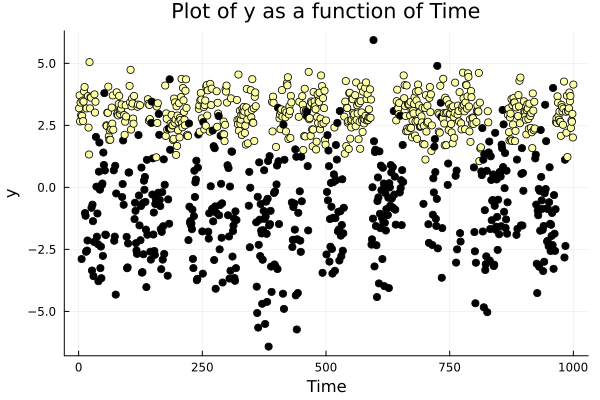

In [5]:
using Plots

time = 1:length(y)

scatter(time, y, zcolor=z[:,1], legend=false)
xlabel!("Time")
ylabel!("y")
title!("Plot of y as a function of Time")

### fit estimator model

In [6]:
est_model = SwitchingGaussianRegression(num_features=1, num_targets=1, K=2)
SSM.fit!(est_model, X, y)

update regression worked
adding noise worked
Log-Likelihood at iter 1: -3489.830666821408
Log-Likelihood at iter 2: -2951.394046363113
Log-Likelihood at iter 3: -2397.208756196071
Log-Likelihood at iter 4: -2016.406855381535
Log-Likelihood at iter 5: -1837.6126627525448
Log-Likelihood at iter 6: -1873.9400037443775
Log-Likelihood at iter 7: -1874.4498835255097
Log-Likelihood at iter 8: -1874.5074245490543
Log-Likelihood at iter 9: -1874.5162111652878
Log-Likelihood at iter 10: -1874.517581685021
Log-Likelihood at iter 11: -1874.5177958146626
Log-Likelihood at iter 12: -1874.5178292654105
Log-Likelihood at iter 13: -1874.5178344714693
Log-Likelihood at iter 14: -1874.51783531806


15-element Vector{Float64}:
   -Inf
 -3489.830666821408
 -2951.394046363113
 -2397.208756196071
 -2016.406855381535
 -1837.6126627525448
 -1873.9400037443775
 -1874.4498835255097
 -1874.5074245490543
 -1874.5162111652878
 -1874.517581685021
 -1874.5177958146626
 -1874.5178292654105
 -1874.5178344714693
 -1874.51783531806

In [7]:
print(est_model.B[1].regression.β)

[-0.9919382470579442; 1.9976686597920152;;]

## 2D features, 2D targets

### generate data

In [8]:
model = SwitchingGaussianRegression(num_features=2, num_targets=2, K=2)

model.A = [0.9 0.1;
        0.1 0.9]

model.πₖ = [1, 0]


covariance = [0.2 0;
                0 0.4]
coefficients = [1 1;
                3 0.5
                -1 2]

emission_1 = RegressionEmissions(GaussianRegression(coefficients, covariance, num_features=2, num_targets=2))


covariance = [0.5 0.3;
                0.3 0.4]
coefficients = [0 -1;
                0.1 2
                -2 4]

emission_2 = RegressionEmissions(GaussianRegression(coefficients, covariance, num_features=2, num_targets=2))

model.B[1] = emission_1
model.B[2] = emission_2

RegressionEmissions(GaussianRegression(2, 2, [0.0 -1.0; 0.1 2.0; -2.0 4.0], [0.5 0.3; 0.3 0.4], true, 0.0))

In [9]:
n = 1000
X = randn(n, 2)


y, z = SSM.sample(model, X)

([0.4363909374744772 -4.648442967170359; 1.4587003062920725 -3.3797792522999788; … ; 0.4996657061097622 -6.96752624472367; -2.924670444169773 5.779522144161939], [1.0 0.0; 1.0 0.0; … ; 0.0 1.0; 0.0 1.0])

### fit the estimator model

In [10]:
est_model = SwitchingGaussianRegression(num_features=2, num_targets=2, K=2)
SSM.fit!(est_model, X, y)


update regression worked
adding noise worked
Log-Likelihood at iter 1: -5180.401968135431
Log-Likelihood at iter 2: -4492.543251119784
Log-Likelihood at iter 3: -3639.8084477454245
Log-Likelihood at iter 4: -3125.3227560187456
Log-Likelihood at iter 5: -3191.0656876070752
Log-Likelihood at iter 6: -3196.737894919412
Log-Likelihood at iter 7: -3197.207569305506
Log-Likelihood at iter 8: -3197.24962711883
Log-Likelihood at iter 9: -3197.2536691417113
Log-Likelihood at iter 10: -3197.2540671692427
Log-Likelihood at iter 11: -3197.2541068178884
Log-Likelihood at iter 12: -3197.2541107503725
Log-Likelihood at iter 13: -3197.254111107683


14-element Vector{Float64}:
   -Inf
 -5180.401968135431
 -4492.543251119784
 -3639.8084477454245
 -3125.3227560187456
 -3191.0656876070752
 -3196.737894919412
 -3197.207569305506
 -3197.24962711883
 -3197.2536691417113
 -3197.2540671692427
 -3197.2541068178884
 -3197.2541107503725
 -3197.254111107683